In [218]:
# Исследование распространения лазерного пучка методами Фурье-оптики.
# вариант 7
# λ, мкм Апертуры Размер сетки, мкм*мкм a, мкм -1 b f, м

# I. Диафрагма, выделяющая центральный пик в Фурье-спектре.
# II. Апертура, закрывающая центральный пик в Фурье-спектре.
# III. Горизонтальная щель
# IV. Вертикальная щель

"""
w0 = 300 * 10**-6
#Две круглые апертуры на расстоянии 3r0
r0 = 300 * 10**-6
L1 = 1
f = 0.08
λ = 0.512 * 10**-6 
"""

w0 = 300
#Две круглые апертуры на расстоянии 3r0
r0 = 300
L1 = 1 * 10**6
f = 0.08 * 10**6
λ = 0.512 
r_0 = 300

N = 1024

dx = 4*2000 /(N - 1)
dy = dx
X = [i*dx - 4000 for i in range(N-1)]
Y = [i*dy - 4000 for i in range(N-1)]
'''
λ2 = 1064 * 10**-6 
Aperturs = [1,2,4] 
RazmerX = 800 * 10**-6 
RazmerY = 800 * 10**-6 
a = 0.010 * 10**6 
b = 0.9 
f = 0.25
'''
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from decimal import *

In [39]:

def k(x, y):
    return np.exp(Decimal(-2) * (Decimal(x)**Decimal(2) + Decimal(y)**Decimal(2)) / (Decimal(w0)**Decimal(2)))
def k_(x, y):
    return np.exp((-2) * ((x)**(2) + (y)**(2)) / ((w0)**(2)))

def k_full(x, y):
    return x**2 + y**2 < r_0**2



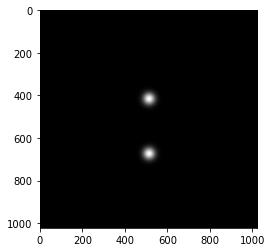

In [145]:
def E1(x, y):
    if (x + r0*2.5)**2 + y**2  < r0**2:
        return 1
    
    if (x - r0*2.5)**2 + y**2  < r0**2:
        return 1
    return 0
def k_(x, y):
    return np.exp((-2) * ((x)**(2) + (y)**(2)) / ((w0)**(2)))
def E1_k(x, y):
    if(x < N/2):
        return k_(x + r0*2.5, y)
    if(x > N/2):
        return k_(N/2 - x + r0*2.5, y)
    return 0

U0_var = [[ E1_k(X[i], Y[j]) for j in range(N-1)] for i in range(N-1)]
plt.imshow(U0_var, cmap='gray')

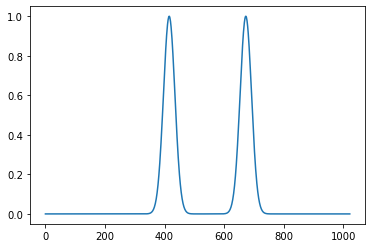

In [23]:
plt.plot(np.transpose(U0_var)[math.floor(N/2)]) 

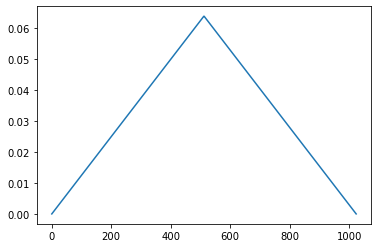

In [36]:
α = [0] * (N)
for i in range(math.floor(N/2)):
    α[i] = (i / (N * dx))
    α[N - i - 1] = α[i]
plt.plot(α)

In [63]:
k = 2 * 3.141592653589793638 / λ
2.718281828459045

def H0(z):
    return [[np.exp(-1j * k * z *math.sqrt(1 - (α[i] * λ)**2 - (α[j] * λ)**2)) if ((α[i] * λ)**2 + (α[j] * λ)**2 ) < 1 
             else 0 for j in range(N-1)] for i in range(N-1)]

MovieWriter imagemagick unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0


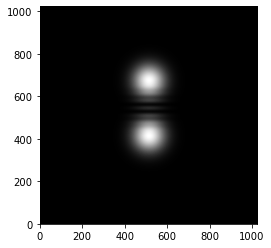

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib.animation import PillowWriter 
from matplotlib import rcParams
%matplotlib inline
# configure full path for ImageMagick

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, N), ylim=(0, N))


I_1 /= np.max(I_1)
im=plt.imshow(I_1, cmap='gray')
# initialization function: plot the background of each frame

# animation function.  This is called sequentially
def animate(iiii):
    print(iiii)

    U0 = U0_var
    A0 = np.fft.fft2(U0)
    A1 = H0(L1+f/10 * iiii) * A0
    U1 = np.fft.ifft2(A1)

    I_1 = np.abs(U1)**2

    I_1 /= np.max(I_1)    
    im.set_data(I_1)
    return [im]

# create animation using the animate() function with no repeat
myAnimation = animation.FuncAnimation(fig, animate, \
                                      interval=10,  repeat=True, frames = 20)

# save animation at 30 frames per second
myAnimation.save('myAnimation.gif', writer='imagemagick', fps=10)

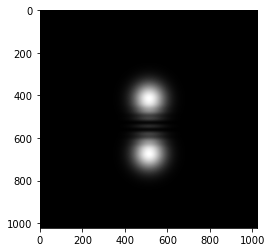

In [146]:
U0 = U0_var
A0 = np.fft.fft2(U0)

A1 = H0(L1) * A0
#H_0_L1 = np.transpose(H0_L1)
U1 = np.fft.ifft2(A1)

#A_0 = F_0 * H_0_L1
#U_1 = np.fft.ifft2(A_0)
I_1 = np.abs(U1)**2
plt.imshow(I_1, cmap='gray')

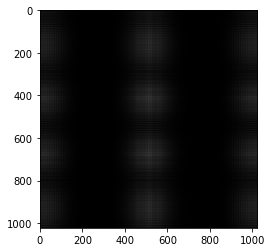

In [198]:
xx = [i for i in range(N-1)]
xx = np.array(xx)
yy = [i for i in range(N-1)]
yy = np.array(yy)
def lense(f, k, x, y):
    return np.exp(1j * k / 2 / f * (x**2 + y**2))
def H1():
    return [[U0[i][j] * lense(f,k,i ,j) for j in range(N-1)] for i in range(N-1)]

U0 = U0_var
A0 = np.fft.fft2(U0)
A1 = H0(L1) * A0
U1 = np.fft.ifft2(A1)

U2 = H1()
A2 = np.fft.fft2(U2)
A3 = H0(L1) * A2
U3 = np.fft.ifft2(A3)

I_1 = np.abs(U3)**2 
I_1 /= np.max(I_1)
plt.imshow(I_1, cmap='gray')

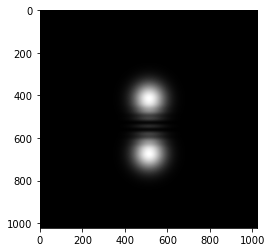

In [199]:
def lense(f, k, x, y):
    return np.exp(1j * k / 2 / f * (x**2 + y**2))
def H1():
    return [[U1[i][j] * lense(f,k,i ,j) for j in range(N-1)] for i in range(N-1)]

U0 = U0_var
A0 = np.fft.fft2(U0)
A1 = H0(L1) * A0
U1 = np.fft.ifft2(A1)

U2 = H1()
A2 = np.fft.fft2(U2)
A3 = H0(0) * A2
U3 = np.fft.ifft2(A3)

I_1 = np.abs(U3)**2 
I_1 /= np.max(I_1)
plt.imshow(I_1, cmap='gray')

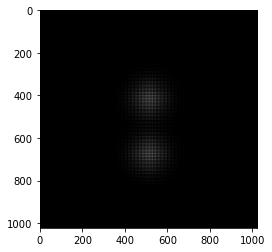

In [229]:
A3 = H0(f) * A2
U3 = np.fft.ifft2(A3)

I_1 = np.abs(U3)**2 
I_1 /= np.max(I_1)
plt.imshow(I_1, cmap='gray')

In [219]:
print(f)

80000.0


MovieWriter imagemagick unavailable; using Pillow instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0


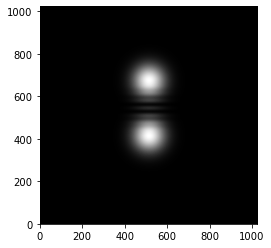

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib.animation import PillowWriter 
from matplotlib import rcParams
%matplotlib inline
# configure full path for ImageMagick

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, N), ylim=(0, N))


I_1 /= np.max(I_1)
im=plt.imshow(I_1, cmap='gray')
# initialization function: plot the background of each frame
U0 = U0_var
A0 = np.fft.fft2(U0)
A1 = H0(L1) * A0
U1 = np.fft.ifft2(A1)


# animation function.  This is called sequentially
def animate(iiii):
    print(iiii)

    A3 = H0(f*iiii /10) * A2
    U3 = np.fft.ifft2(A3)
    I_1 = np.abs(U3)**2 
    I_1 /= np.max(I_1)
    im.set_data(I_1)
    return [im]

# create animation using the animate() function with no repeat
myAnimation = animation.FuncAnimation(fig, animate, \
                                      interval=10,  repeat=True, frames = 20)

# save animation at 30 frames per second
myAnimation.save('myAnimationF0.gif', writer='imagemagick', fps=10)

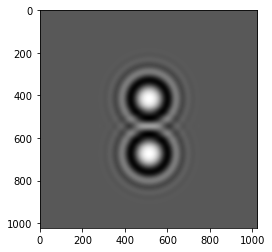

In [25]:
plt.imshow(np.imag(U_1), cmap='gray')

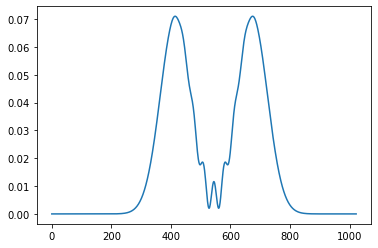

In [26]:
plt.plot(np.transpose(I_1)[math.floor(N/2)])

In [27]:
def B(x, y):
    return np.exp(1j * k / (2 * f) * (x**2 + y **2) )

U1_2 = [[U_1[i][j] * B(X[i], Y[j]) for j in range(N-1)] for i in range(N-1)]
H1_f = H0(f)
F1 = np.fft.fft2(U1_2)
A1 = [[F1[i][j] * H1_f[i][j] for j in range(N-1)] for i in range(N-1)]
U2 = np.fft.ifft2(A1)
I2 = [[np.abs(U2[i][j])**2 for j in range(N-1)] for i in range(N-1)]

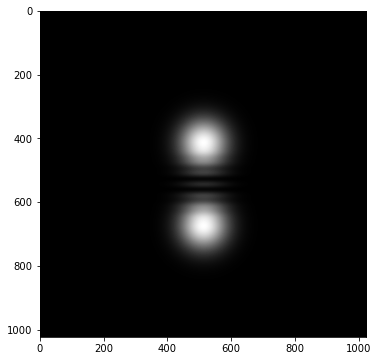

In [28]:
fig, ax = plt.subplots()
ax.imshow(I2, cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

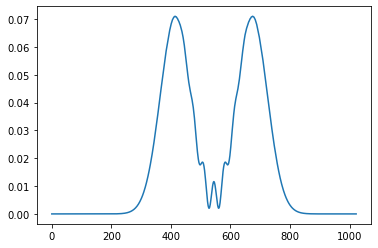

In [29]:
plt.plot(np.transpose(I2)[math.floor(N/2)])

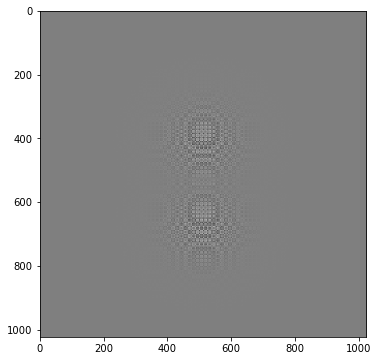

In [30]:

fig, ax = plt.subplots()
ax.imshow(np.real(U2), cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

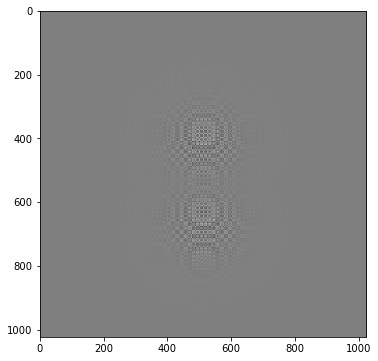

In [31]:

fig, ax = plt.subplots()
ax.imshow(np.imag(U2), cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

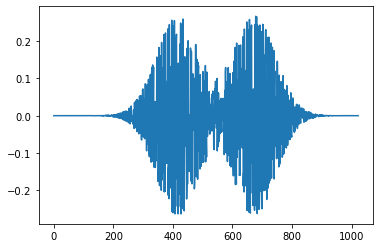

In [32]:
plt.plot(np.transpose(np.real(U2))[math.floor(N/2)])

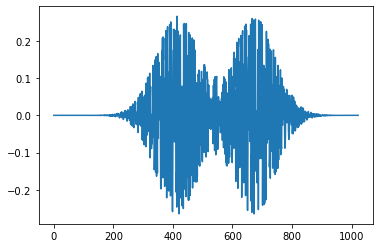

In [33]:
plt.plot(np.transpose(np.imag(U2))[math.floor(N/2)])

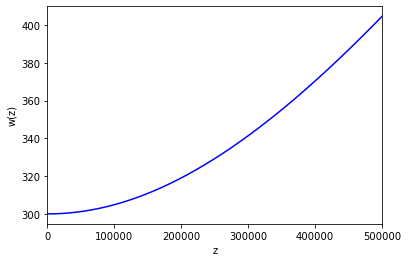

In [34]:
def A(z):
    return 1
def B(z):
    return z
def C(z):
    return 0
def D(z):
    return 1
z0 = 0.0
3.141592653589793638
2.718281828459045

Z_R = np.pi * w0**2 / λ

def q(z):
    return (A(z) * (z0 - 1j * Z_R) + B(z) ) / (C(z) * (z0 - 1j) + D(z))

def w(z):
    return math.sqrt(-λ * q(z).imag * (1 + (q(z).real / q(z).imag)**2) / np.pi)


z = np.linspace(0, 5*10**5,10000)
wz = []
for i in z:
    wz.append(w(i))
plt.plot(z, wz, color='b')
plt.xlim(0, 5*10**5)
plt.xlabel("z")
plt.ylabel("w(z)")

plt.show()



In [35]:
print(w(L1))

620.5798396547914
